# Logistic Regression using Gradient Descent
Logistic Regression is the go to algorithm for classification problems. It is a supervised learning algorithm and it is mainly intended for binary classification problems i.e., output categories are 2 in number. For example, patient will have a fever or not, student passes or fails. Logistic Regression is also called Logit Regression. It is one of the most simple, straightforward and versatile classification algorithms which is used to solve classification problems.

## Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Custom Logistic Regression code

In [2]:
def logisticRegrssionGD(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.001
    
    for i in range(10000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]
        

## Sigmoid Function definition

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

## Read the data

In [4]:
df = pd.read_excel("Data/data.xlsx")
df.head()

,P/F,Age,GPA -highschool
0,P,17,1.30
1,P,18,2.98
2,P,18,1.26
3,P,18,2.31
4,P,18,2.88


In [5]:
df.rename(columns={'GPA -highschool':'GPA'},inplace=True)

* Here we have taken a simple dataset which has 3 columns Age, GPA and Pass/Fail. So based on the Age and GPA we have to classify wheather student passed or failed.

In [6]:
np.median(df['GPA'])

2.3600000000000003

In [7]:
df.describe()

,Age,GPA
count,200.000000,200.000000
mean,53.975000,2.105050
std,19.683281,1.138648
min,17.000000,0.040000
25%,38.000000,1.110000
50%,54.000000,2.360000
75%,70.000000,2.992500
max,89.000000,3.950000


In [8]:
import seaborn as sns

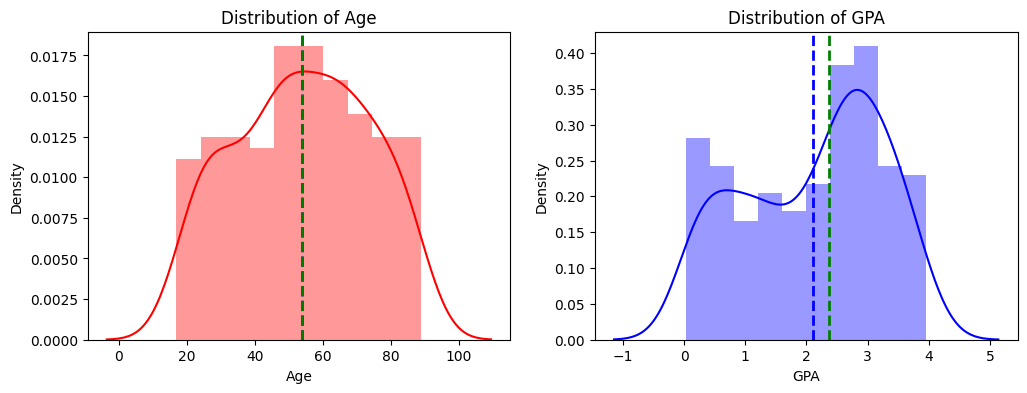

In [9]:
# Calculate mean and median of Ageerature
mean_Age = df['Age'].mean()
median_Age = df['Age'].median()

# Calculate mean and median of GPA
mean_GPA = df['GPA'].mean()
median_GPA = df['GPA'].median()

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['Age'],bins=10,color='r',ax=ax)
# Add mean and median lines
ax.axvline(mean_Age, color='b', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Age:.2f}')
ax.axvline(median_Age, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_Age:.2f}')
ax.set_title('Distribution of Age')

ax=f.add_subplot(122)
sns.distplot(df['GPA'],bins=10,color='b',ax=ax)
# Add mean and median lines
ax.axvline(mean_GPA, color='b', linestyle='dashed', linewidth=2, label=f'Mean: {mean_GPA:.2f}')
ax.axvline(median_GPA, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_GPA:.2f}')
ax.set_title('Distribution of GPA')
plt.show()

* From the above graph we can see that age is almost the same but the GPA has a small difference between mean and median. But the distribtuions are not normal distributions.

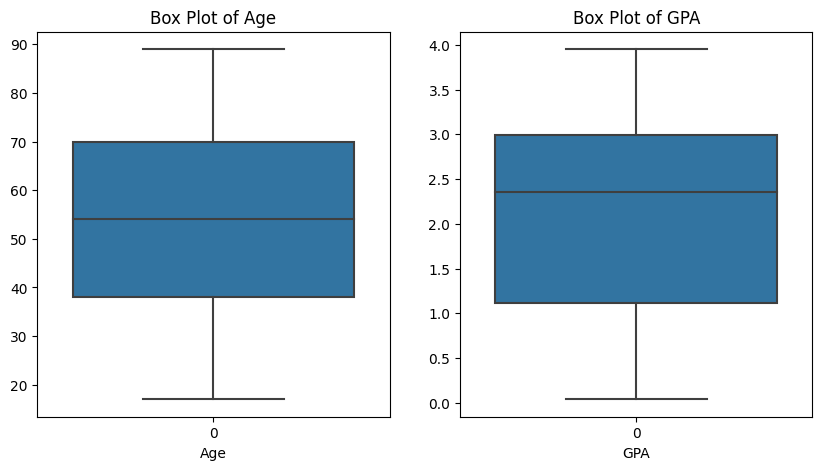

In [10]:
age_data = df['Age']
gpa_data = df['GPA']

# Create a box plot
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.boxplot(data=age_data)  # vert=False for horizontal box plot
plt.xlabel('Age')
plt.title('Box Plot of Age')

plt.subplot(1,2,2)
sns.boxplot(gpa_data)  # vert=False for horizontal box plot
plt.xlabel('GPA')
plt.title('Box Plot of GPA')

plt.show()

* We can see that there are no outliers in the given data

<Figure size 1000x1000 with 0 Axes>

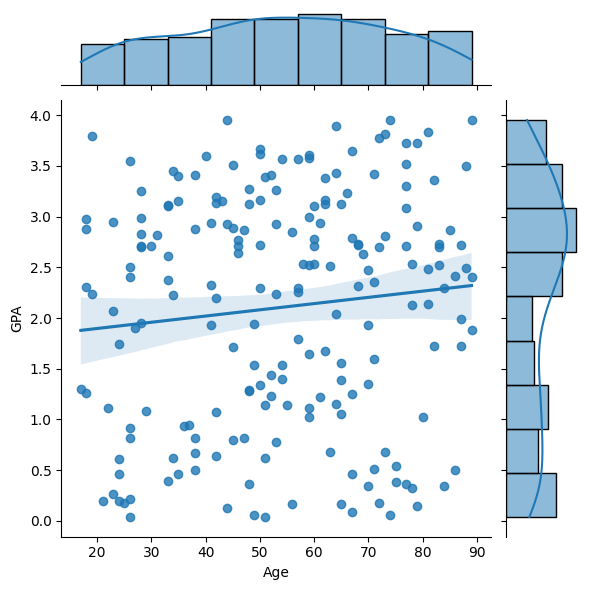

In [11]:
plt.figure(figsize=(10,10))
sns.jointplot(x='Age', y='GPA', data=df, kind='reg')
plt.show()

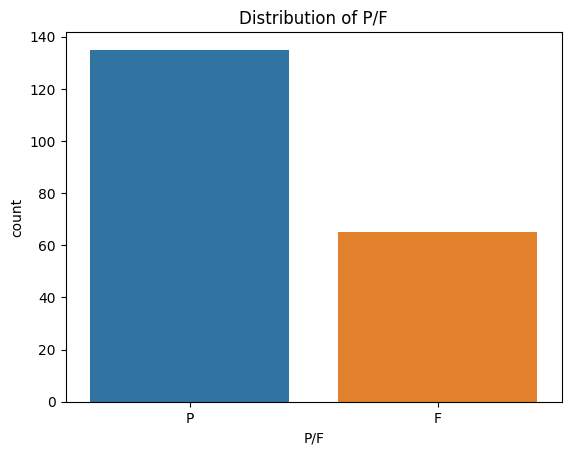

In [12]:
sns.countplot(x=df['P/F'])
plt.title("Distribution of P/F")
plt.show()

* There are more number of students who are passed than Failed which is almost double.

In [13]:
# Converting the ordinal data to 0 and 1 where P =1 and F = 0
Age = df['P/F'].values
y_array = np.where(Age == 'P',1,0)
y_array = pd.Series(np.where(Age == 'P',1,0))
y_array

0      1
1      1
2      1
3      1
4      1
      ..
195    0
196    1
197    0
198    0
199    1
Length: 200, dtype: int32

In [15]:
x_array = df[['Age','GPA']].values
x_array

array([[1.70e+01, 1.30e+00],
       [1.80e+01, 2.98e+00],
       [1.80e+01, 1.26e+00],
       [1.80e+01, 2.31e+00],
       [1.80e+01, 2.88e+00],
       [1.90e+01, 3.79e+00],
       [1.90e+01, 2.24e+00],
       [2.10e+01, 2.00e-01],
       [2.20e+01, 1.11e+00],
       [2.30e+01, 2.07e+00],
       [2.30e+01, 2.70e-01],
       [2.30e+01, 2.95e+00],
       [2.40e+01, 6.10e-01],
       [2.40e+01, 4.60e-01],
       [2.40e+01, 2.00e-01],
       [2.40e+01, 1.74e+00],
       [2.50e+01, 1.80e-01],
       [2.60e+01, 2.20e-01],
       [2.60e+01, 9.20e-01],
       [2.60e+01, 2.40e+00],
       [2.60e+01, 2.50e+00],
       [2.60e+01, 4.00e-02],
       [2.60e+01, 8.20e-01],
       [2.60e+01, 3.55e+00],
       [2.70e+01, 1.90e+00],
       [2.80e+01, 3.25e+00],
       [2.80e+01, 1.95e+00],
       [2.80e+01, 2.83e+00],
       [2.80e+01, 2.71e+00],
       [2.80e+01, 2.99e+00],
       [2.80e+01, 2.70e+00],
       [2.90e+01, 1.08e+00],
       [3.00e+01, 2.71e+00],
       [3.10e+01, 2.82e+00],
       [3.30e+

Text(0, 0.5, 'GPA')

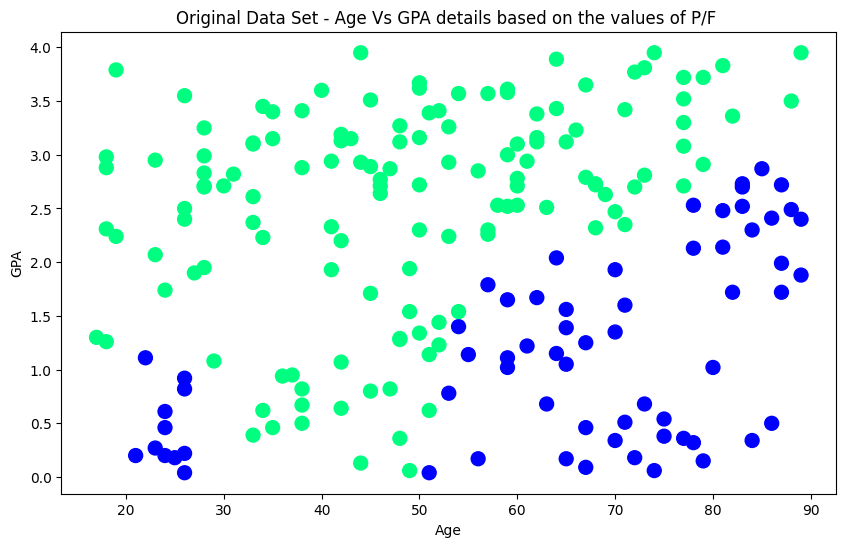

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(x_array[:,0],x_array[:,1],c=y_array,cmap='winter',s=100)
plt.title("Original Data Set - Age Vs GPA details based on the values of P/F ")
plt.xlabel('Age')
plt.ylabel('GPA')

In [17]:
df1 = df[['Age','GPA']]
# calculate Z-scores for columns A, B, and C
cols = list(df1.columns)
zscore = df[cols].apply(lambda x: (x - np.mean(x)) / np.std(x))
zscore_array = zscore.values
zscore_array

array([[-1.88321177e+00, -7.08796838e-01],
       [-1.83227974e+00,  7.70339474e-01],
       [-1.83227974e+00, -7.44014369e-01],
       [-1.83227974e+00,  1.80445826e-01],
       [-1.83227974e+00,  6.82295646e-01],
       [-1.78134771e+00,  1.48349448e+00],
       [-1.78134771e+00,  1.18815146e-01],
       [-1.67948365e+00, -1.67727895e+00],
       [-1.62855163e+00, -8.76080111e-01],
       [-1.57761960e+00, -3.08593617e-02],
       [-1.57761960e+00, -1.61564827e+00],
       [-1.57761960e+00,  7.43926325e-01],
       [-1.52668757e+00, -1.31629925e+00],
       [-1.52668757e+00, -1.44836499e+00],
       [-1.52668757e+00, -1.67727895e+00],
       [-1.52668757e+00, -3.21403994e-01],
       [-1.47575554e+00, -1.69488771e+00],
       [-1.42482351e+00, -1.65967018e+00],
       [-1.42482351e+00, -1.04336338e+00],
       [-1.42482351e+00,  2.59685271e-01],
       [-1.42482351e+00,  3.47729099e-01],
       [-1.42482351e+00, -1.81814907e+00],
       [-1.42482351e+00, -1.13140721e+00],
       [-1.

Text(0, 0.5, 'GPA Z-scores')

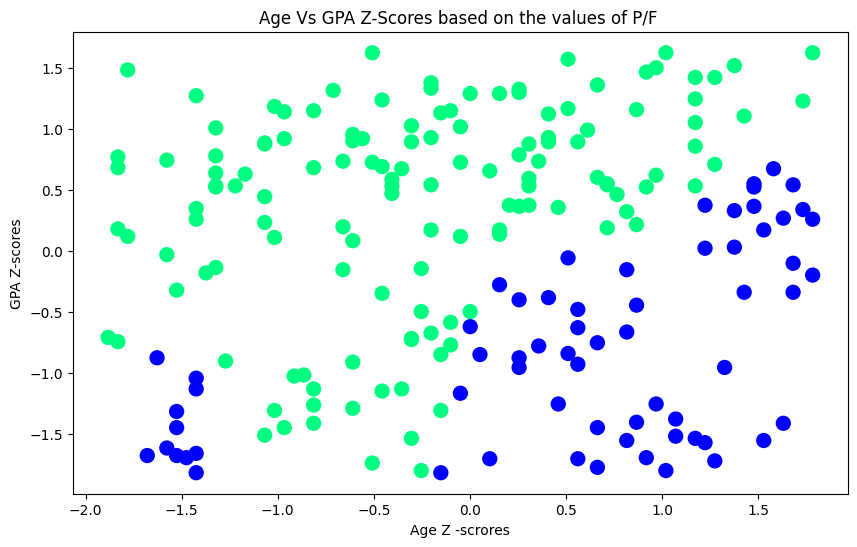

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(zscore_array[:,0],zscore_array[:,1],c=y_array,cmap='winter',s=100)
plt.title("Age Vs GPA Z-Scores based on the values of P/F ")
plt.xlabel('Age Z -scrores')
plt.ylabel('GPA Z-scores')

In [19]:
coef_1,intercept_1 = logisticRegrssionGD(zscore_array,y_array)

In [20]:
m1 = -(coef_1[0]/coef_1[1])
b1 = -(intercept_1/coef_1[1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input1 + b1

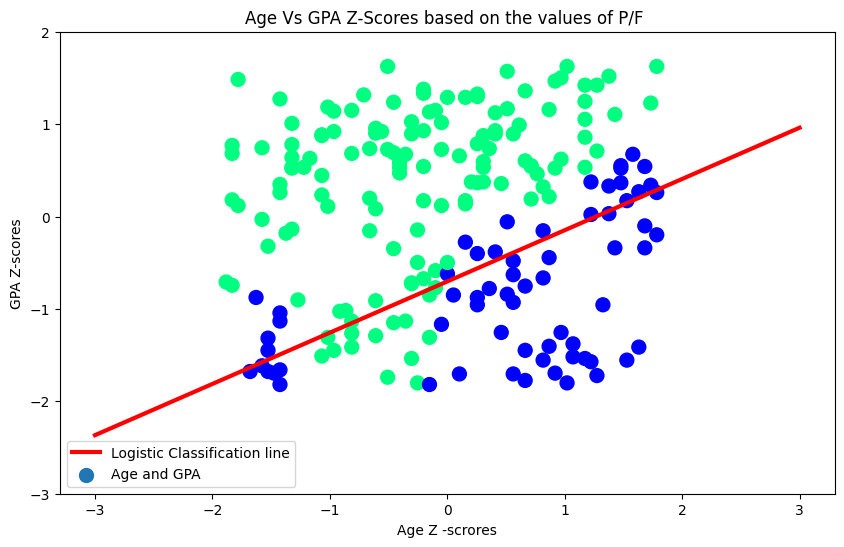

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x_input1,y_input1,color='red',linewidth=3,label='Logistic Classification line')
plt.scatter(zscore_array[:,0],zscore_array[:,1],c=y_array,cmap='winter',s=100,label="Age and GPA")
plt.title("Age Vs GPA Z-Scores based on the values of P/F ")
plt.xlabel('Age Z -scrores')
plt.ylabel('GPA Z-scores')
plt.ylim(-3,2)
plt.legend()

In [22]:
# Using SCIKIT learn for cross verification of the above defined custom code
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(zscore_array,y_array)
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

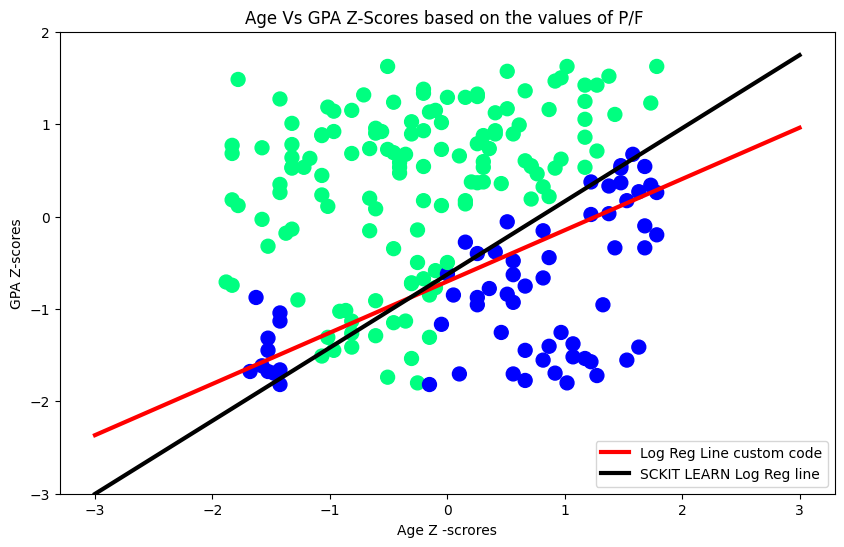

In [23]:
plt.figure(figsize=(10,6))
plt.plot(x_input1,y_input1,color='red',linewidth=3,label="Log Reg Line custom code")
plt.plot(x_input,y_input,color='black',linewidth=3,label="SCKIT LEARN Log Reg line")
plt.scatter(zscore_array[:,0],zscore_array[:,1],c=y_array,cmap='winter',s=100)
plt.title("Age Vs GPA Z-Scores based on the values of P/F ")
plt.xlabel('Age Z -scrores')
plt.ylabel('GPA Z-scores')
plt.ylim(-3,2)
plt.legend()

From the above graph, we can see that the custum logit code and sklearn code classify and same